# Blood Cell Identification

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import PIL
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from IPython.display import display
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler

In [2]:
folder = r'C:\ML\data\blood cell identification'

os.listdir(folder)

['basophil',
 'eosinophil',
 'erythroblast',
 'ig',
 'lymphocyte',
 'monocyte',
 'neutrophil',
 'platelet']

In [3]:
train = []
label = []


for i in os.listdir(folder):
    train_class = os.listdir(os.path.join(folder, i))
    for j in train_class:
        img = os.path.join(folder, i, j)
        train.append(img)
        label.append(i)
        
print('Number of training images {}'.format(len(train)))

Number of training images 17087


In [4]:
No_images_per_class = []
Class_name = []
for i in os.listdir(folder):
      train_class = os.listdir(os.path.join(folder, i))
      No_images_per_class.append(len(train_class))
      Class_name.append(i)
      print('Number of images in {} = {}'.format(i, len(train_class)))

Number of images in basophil = 1213
Number of images in eosinophil = 3117
Number of images in erythroblast = 1551
Number of images in ig = 2895
Number of images in lymphocyte = 1214
Number of images in monocyte = 1420
Number of images in neutrophil = 3329
Number of images in platelet = 2348


[Text(0, 0, 'basophil'),
 Text(0, 0, 'eosinophil'),
 Text(0, 0, 'erythroblast'),
 Text(0, 0, 'ig'),
 Text(0, 0, 'lymphocyte'),
 Text(0, 0, 'monocyte'),
 Text(0, 0, 'neutrophil'),
 Text(0, 0, 'platelet')]

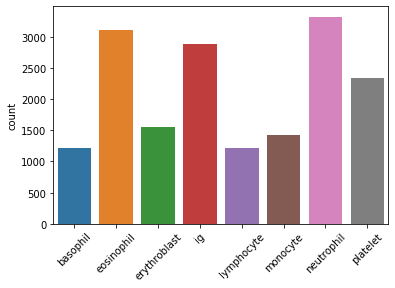

In [5]:
g = sns.countplot(label)
g.set_xticklabels(g.get_xticklabels(), rotation=45)

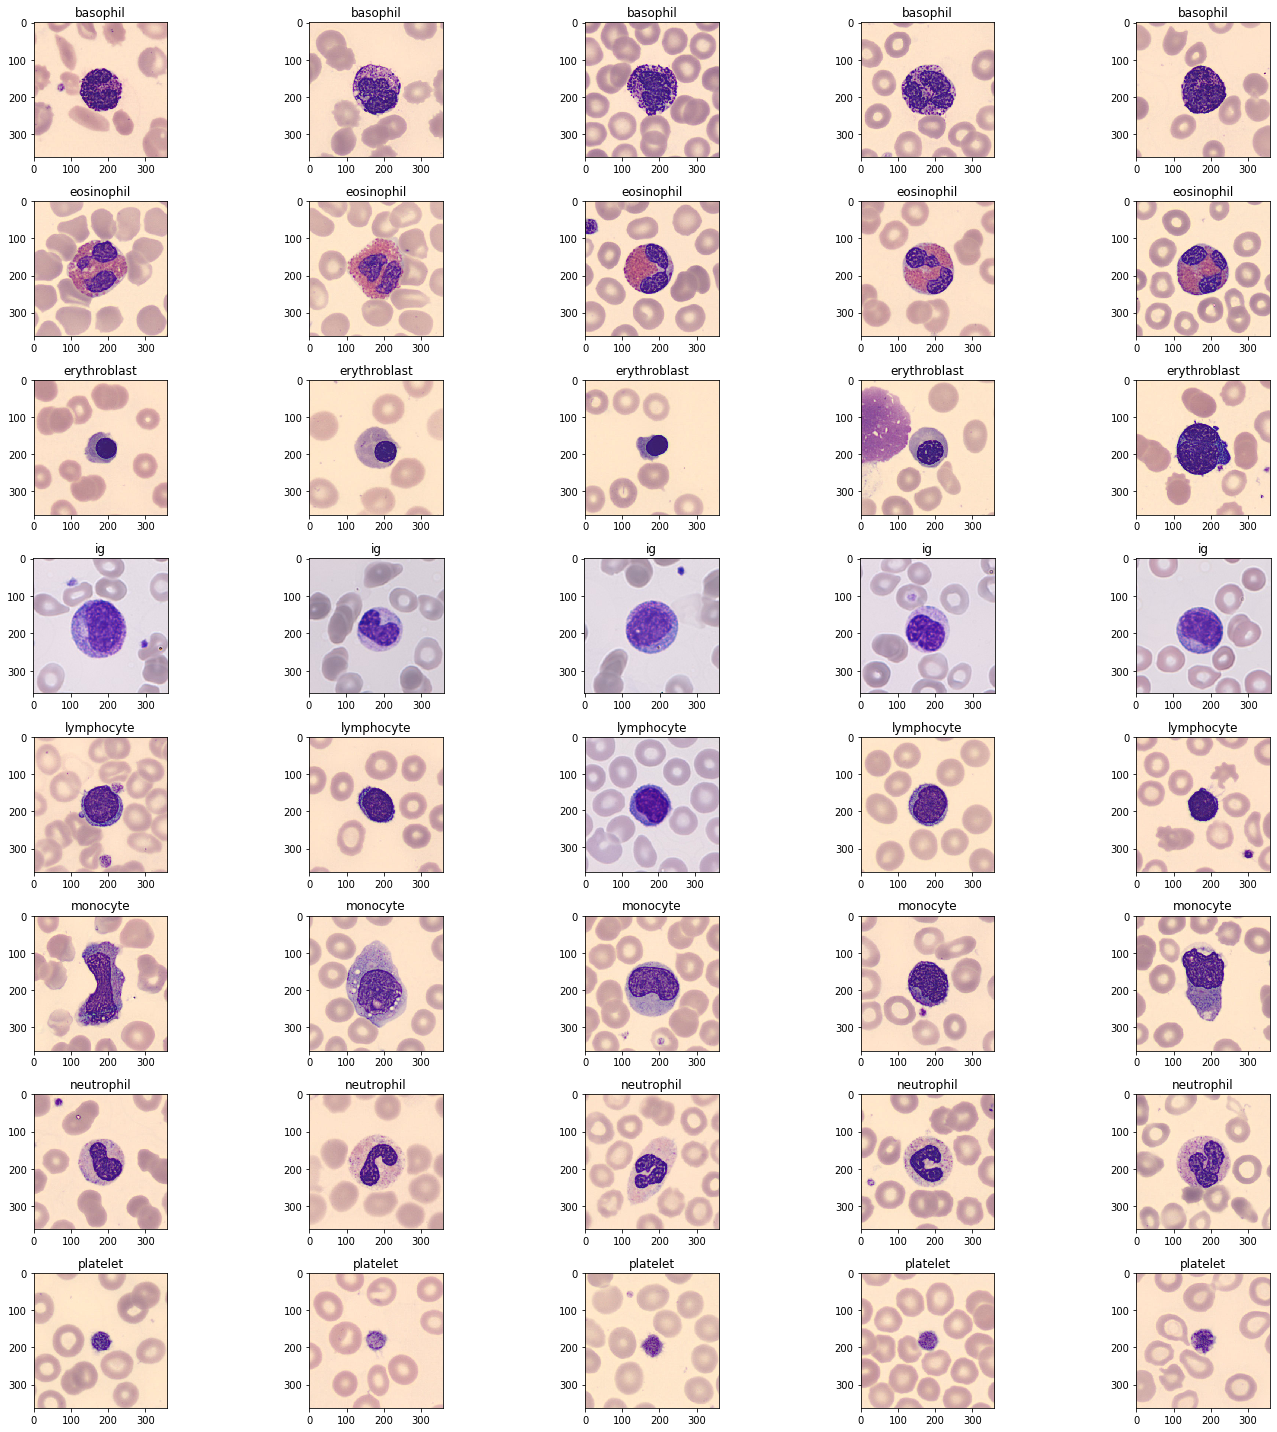

In [6]:
fig,ax=plt.subplots(8,5, figsize=(20,20))
count=0
for i in os.listdir(folder):
    train_class = os.listdir(os.path.join(folder, i))
    
    for j in range(5):
        img = os.path.join(folder, i, train_class[j])
        img = PIL.Image.open(img)
        ax[count][j].title.set_text(i)
        ax[count][j].imshow(img)
        
    count += 1
    
fig.tight_layout()

In [7]:
blood_cell_df = pd.DataFrame({'Image': train, 'Label':label})
blood_cell_df

,Image,Label
0,C:\ML\data\blood cell identification\basophil\...,basophil
1,C:\ML\data\blood cell identification\basophil\...,basophil
2,C:\ML\data\blood cell identification\basophil\...,basophil
3,C:\ML\data\blood cell identification\basophil\...,basophil
4,C:\ML\data\blood cell identification\basophil\...,basophil
...,...,...
17082,C:\ML\data\blood cell identification\platelet\...,platelet
17083,C:\ML\data\blood cell identification\platelet\...,platelet
17084,C:\ML\data\blood cell identification\platelet\...,platelet
17085,C:\ML\data\blood cell identification\platelet\...,platelet


In [8]:
basophil = blood_cell_df[blood_cell_df['Label'] == 'basophil']
basophil = basophil.head(1200)
print(basophil.shape)

eosinophil = blood_cell_df[blood_cell_df['Label'] == 'eosinophil']
eosinophil = eosinophil.head(1200)
print(eosinophil.shape)

erythroblast = blood_cell_df[blood_cell_df['Label'] == 'erythroblast']
erythroblast = erythroblast.head(1200)
print(erythroblast.shape)

ig = blood_cell_df[blood_cell_df['Label'] == 'ig']
ig = ig.head(1200)
print(ig.shape)

lymphocyte = blood_cell_df[blood_cell_df['Label'] == 'lymphocyte']
lymphocyte = lymphocyte.head(1200)
print(lymphocyte.shape)

monocyte = blood_cell_df[blood_cell_df['Label'] == 'monocyte']
monocyte = monocyte.head(1200)
print(monocyte.shape)

neutrophil = blood_cell_df[blood_cell_df['Label'] == 'neutrophil']
neutrophil = neutrophil.head(1200)
print(neutrophil.shape)

platelet = blood_cell_df[blood_cell_df['Label'] == 'platelet']
platelet = platelet.head(1200)
print(platelet.shape)

blood_cell_df = basophil.append(eosinophil).append(erythroblast).append(ig).append(lymphocyte).append(monocyte).append(neutrophil).append(platelet)
blood_cell_df.shape

(1200, 2)
(1200, 2)
(1200, 2)
(1200, 2)
(1200, 2)
(1200, 2)
(1200, 2)
(1200, 2)


(9600, 2)

In [9]:
blood_cell_df = shuffle(blood_cell_df)
train, test = train_test_split(blood_cell_df, test_size=0.2)

In [10]:
test

,Image,Label
9707,C:\ML\data\blood cell identification\lymphocyt...,lymphocyte
15866,C:\ML\data\blood cell identification\platelet\...,platelet
15170,C:\ML\data\blood cell identification\platelet\...,platelet
12389,C:\ML\data\blood cell identification\neutrophi...,neutrophil
14931,C:\ML\data\blood cell identification\platelet\...,platelet
...,...,...
12052,C:\ML\data\blood cell identification\neutrophi...,neutrophil
12182,C:\ML\data\blood cell identification\neutrophi...,neutrophil
6567,C:\ML\data\blood cell identification\ig\MMY_55...,ig
4833,C:\ML\data\blood cell identification\erythrobl...,erythroblast


In [11]:
# Shuffle the data and split it into training and testing
blood_cell_df = shuffle(blood_cell_df)
train, test = train_test_split(blood_cell_df, test_size = 0.2)

In [12]:
# Create run-time augmentation on training and test dataset
# For training datagenerator, we add normalization, shear angle, zooming range and horizontal flip
train_datagen = ImageDataGenerator(
        rescale = 1./255,
        shear_range = 0.2,
        validation_split = 0.15)

# For test datagenerator, we only normalize the data.
test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Creating datagenerator for training, validation and test dataset.

train_generator = train_datagen.flow_from_dataframe(
    train,
    directory=folder,
    x_col="Image",
    y_col="Label",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='training')

validation_generator = train_datagen.flow_from_dataframe(
    train,
    directory=folder,
    x_col="Image",
    y_col="Label",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32,
    subset='validation')

test_generator = test_datagen.flow_from_dataframe(
    test,
    directory=folder,
    x_col="Image",
    y_col="Label",
    target_size=(256, 256),
    color_mode="rgb",
    class_mode="categorical",
    batch_size=32)

Found 6528 validated image filenames belonging to 8 classes.
Found 1152 validated image filenames belonging to 8 classes.
Found 1920 validated image filenames belonging to 8 classes.


In [14]:
def res_block(X, filter, stage):
  
  # Convolutional_block
  X_copy = X

  f1 , f2, f3 = filter
    
  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)


  # Short path
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 1
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 2
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X

In [15]:
input_shape = (256,256,3)

#Input tensor shape
X_input = Input(input_shape)

#Zero-padding

X = ZeroPadding2D((3,3))(X_input)

# 1 - stage

X = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides= (2,2))(X)

# 2- stage

X = res_block(X, filter= [64,64,256], stage= 2)

# 3- stage

X = res_block(X, filter= [128,128,512], stage= 3)

# 4- stage

X = res_block(X, filter= [256,256,1024], stage= 4)

# # 5- stage

# X = res_block(X, filter= [512,512,2048], stage= 5)

#Average Pooling

X = AveragePooling2D((2,2), name = 'Averagea_Pooling')(X)

#Final layer

X = Flatten()(X)
X = Dense(8, activation = 'softmax', name = 'Dense_final', kernel_initializer= glorot_uniform(seed=0))(X)


model = Model( inputs= X_input, outputs = X, name = 'Resnet18')

model.summary()

Model: "Resnet18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 128, 64) 9472        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 128, 128, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [16]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics= ['accuracy'])

In [17]:
#using early stopping to exit training if validation loss is not decreasing even after certain epochs (patience)
earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

#save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath="weights.hdf5", verbose=1, save_best_only=True)

In [18]:
history = model.fit(train_generator, steps_per_epoch = train_generator.n // 32, epochs = 1, validation_data= validation_generator, validation_steps= validation_generator.n // 32, callbacks=[checkpointer , earlystopping])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 204 steps, validate for 36 steps
203/204 [============================>.] - ETA: 5s - loss: 1.1774 - accuracy: 0.7542 
Epoch 00001: val_loss improved from inf to 15.33268, saving model to weights.hdf5
204/204 [==============================] - 1225s 6s/step - loss: 1.1734 - accuracy: 0.7544 - val_loss: 15.3327 - val_accuracy: 0.1102


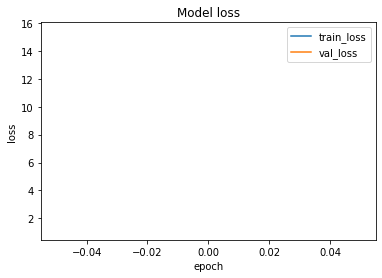

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

In [20]:
#model.load_weights("retina_weights.hdf5")

In [21]:
# Evaluate the performance of the model
evaluate = model.evaluate(test_generator, steps = test_generator.n // 32, verbose =1)

print('Accuracy Test : {}'.format(evaluate[1]))

  ...
    to  
  ['...']
60/60 [==============================] - 76s 1s/step - loss: 14.9881 - accuracy: 0.1302
Accuracy Test : 0.1302083283662796


In [22]:
# Assigning label names to the corresponding indexes
labels = {0: 'basophil', 1: 'eosinophil', 2: 'erythroblast', 3:'ig', 4: 'lymphocyte', 5:'monocyte', 6:'neutrophil', 7:'platelet'}

In [23]:
# Loading images and their predictions 

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# import cv2

prediction = []
original = []
image = []
count = 0

for item in range(len(test)):
  # code to open the image
  img= PIL.Image.open(test['Image'].tolist()[item])
  # resizing the image to (256,256)
  img = img.resize((256,256))
  # appending image to the image list
  image.append(img)
  # converting image to array
  img = np.asarray(img, dtype= np.float32)
  # normalizing the image
  img = img / 255
  # reshaping the image in to a 4D array
  img = img.reshape(-1,256,256,3)
  # making prediction of the model
  predict = model.predict(img)
  # getting the index corresponding to the highest value in the prediction
  predict = np.argmax(predict)
  # appending the predicted class to the list
  prediction.append(labels[predict])
  # appending original class to the list
  original.append(test['Label'].tolist()[item])

In [24]:
# Getting the test accuracy 
score = accuracy_score(original, prediction)
print("Test Accuracy : {}".format(score))

Test Accuracy : 0.13020833333333334


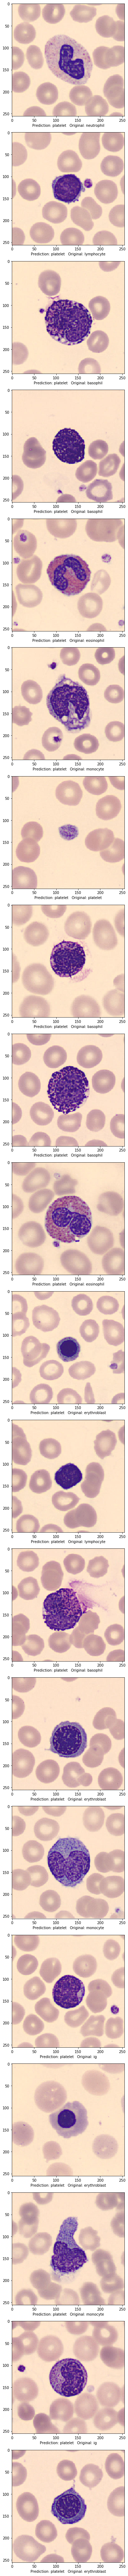

In [25]:
# Visualizing the results
import random
fig=plt.figure(figsize = (100,100))
for i in range(20):
    j = random.randint(0,len(image))
    fig.add_subplot(20, 1, i+1)
    plt.xlabel("Prediction: " + prediction[j] +"   Original: " + original[j])
    plt.imshow(image[j])
fig.tight_layout()
plt.show()